<div align=center>

<p></p>
<p></p>
<font size=5>

<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Winter 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 1 - Q2
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  March the 16th


<br/>
<br/>
<b>

Kian Izadpanah 400104783
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



<h1 style="text-align: center">
Machine Learning </br>
MLE & MAP in Python
</h1>


## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

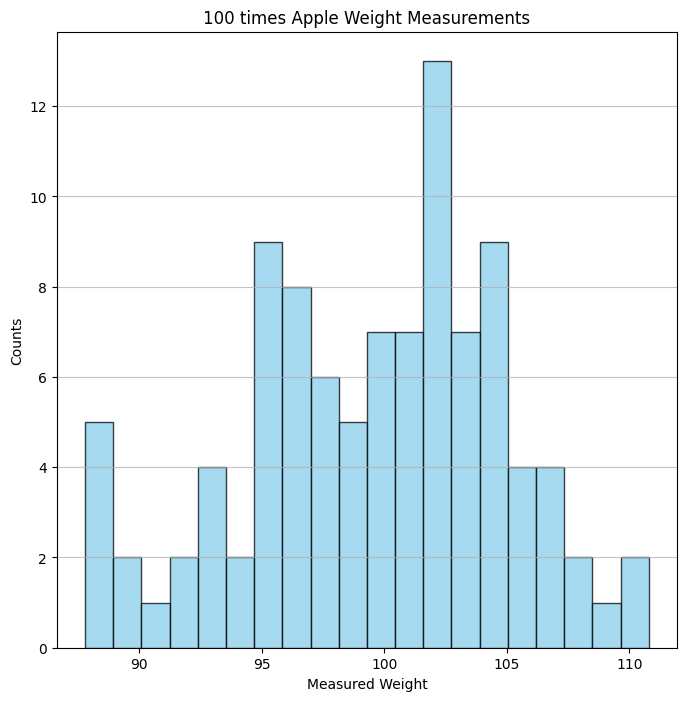

In [1]:
# Let's imagine the real weight is 100g
import numpy as np
import matplotlib.pyplot as plt

mean_weight = 100
measurements = mean_weight + np.random.normal(0, 5, 100)

plt.figure(figsize=(8, 8))
plt.hist(measurements, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel('Measured Weight')
plt.ylabel('Counts')
plt.title('100 times Apple Weight Measurements')
plt.grid(axis='y', alpha=0.75)
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [2]:
mean_measurements = np.mean(measurements)
print("averge weight is: ", mean_measurements)

averge weight is:  99.60335912487191


***Answer: It seems to be a good guess because the noise is a normal distribution with the mean of 0 and in too many attemps it seems to converge to the real weight.***

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

***Answer: a) Log is a strictly increasing function therefore, applying the log to the likelihood wouldn't change the peak of the likelihood and it will convert our product term to a sum term which is easier to compute.***

In [3]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 100)

max_log_likelihood = -np.inf
max_weight = 0

for i in range(len(weight_grid)):
    guess = weight_grid[i]
    data = np.random.normal(guess, 10, 100)
    log_likelihood = 0
    for d in data:
        log_likelihood += norm(guess, 10).logpdf(d)
    if log_likelihood > max_log_likelihood:
        max_log_likelihood = log_likelihood
        max_weight = guess

print("tha maximum likelihood estimate of the weight is: ", max_weight)

tha maximum likelihood estimate of the weight is:  61.224489795918366


Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [4]:
import numpy as np
from scipy.stats import norm, invgamma


# The barrel of apples
# The average apples is between 70-100 g
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)

# NOTE: Try changing the scale error
# in practice, you would not know this number
SCALE_ERR = 5

# NOTE: Try changing the number of measurements taken
N_MEASURMENTS = 10

# NOTE: Try changing the prior values and distributions
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)


def get_mle(measurements):
    log_likelihood_grid = get_log_likelihood_grid(measurements)
    grid_shape = log_likelihood_grid.shape
    max_index = np.unravel_index(np.argmax(log_likelihood_grid), grid_shape)
    mle_estimation = WEIGHT_GUESSES[max_index[1]]
    return mle_estimation

def get_map(measurements):
    log_posterior_grid = get_log_likelihood_grid(measurements) + LOG_PRIOR_GRID
    grid_shape = log_posterior_grid.shape
    max_index = np.unravel_index(np.argmax(log_posterior_grid), grid_shape)
    map_estimation = WEIGHT_GUESSES[max_index[1]]
    return map_estimation


# Pick an apple at random
apple = np.random.choice(BARREL)

# weight the apple
measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 73.315 g
Maximum Likelihood estimate: 73.364 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 73.056 g


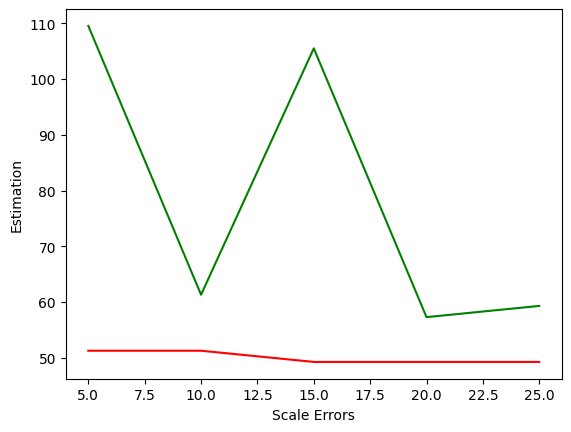

In [5]:
# Playing with the SCALE_ERR
class Estimator():
    def read_scale(self, apple):
        return apple + np.random.normal(loc=0, scale=SCALE_ERR)


    def get_log_likelihood_grid(self, measurments, WEIGHT_GUESSES, ERROR_GUESSES):
        log_liklelihood = [
            [
                norm(weight_guess, error_guess).logpdf(measurments).sum()
                for weight_guess in WEIGHT_GUESSES
            ]
            for error_guess in ERROR_GUESSES
        ]
        return np.asarray(log_liklelihood)


    def get_mle(self, measurements, WEIGHT_GUESSES, ERROR_GUESSES):
        log_likelihood_grid = self.get_log_likelihood_grid(measurements, WEIGHT_GUESSES, ERROR_GUESSES)
        grid_shape = log_likelihood_grid.shape
        max_index = np.unravel_index(np.argmax(log_likelihood_grid), grid_shape)
        mle_estimation = WEIGHT_GUESSES[max_index[1]]
        return mle_estimation

    def get_map(self, measurements, WEIGHT_GUESSES, ERROR_GUESSES, LOG_PRIOR_GRID):
        log_posterior_grid = self.get_log_likelihood_grid(measurements, WEIGHT_GUESSES, ERROR_GUESSES)\
                                                                            + LOG_PRIOR_GRID
        grid_shape = log_posterior_grid.shape
        max_index = np.unravel_index(np.argmax(log_posterior_grid), grid_shape)
        map_estimation = WEIGHT_GUESSES[max_index[1]]
        return map_estimation
    
    def result(self, N_MEASURMENTS, BARREL, WEIGHT_GUESSES, ERROR_GUESSES, PRIOR_WEIGHT, PRIOR_ERR, LOG_PRIOR_GRID):
        apple = np.random.choice(BARREL)
        measurments = np.asarray([self.read_scale(apple) for _ in range(N_MEASURMENTS)])
        return self.get_mle(measurments, WEIGHT_GUESSES, ERROR_GUESSES), \
            self.get_map(measurments, WEIGHT_GUESSES, ERROR_GUESSES, LOG_PRIOR_GRID), apple

        

BARREL = np.random.normal(loc=85, scale=20, size=100)
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)
N_MEASURMENTS = 10
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)
apple = np.random.choice(BARREL)
measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

estimator = Estimator()
# different SCALE_ERR
SCALE_ERRs = [5, 10, 15, 20, 25]
MLEs = []
MAPs = []
for SCALE_ERR in SCALE_ERRs:
    tmp1, tmp2, _ = estimator.result(N_MEASURMENTS, BARREL, WEIGHT_GUESSES,\
                                     ERROR_GUESSES, PRIOR_WEIGHT, PRIOR_ERR, LOG_PRIOR_GRID)
    MLEs.append(tmp1)
    MAPs.append(tmp2)

plt.plot(SCALE_ERRs, MLEs, color='green')
plt.plot(SCALE_ERRs, MAPs, color='red')
plt.xlabel("Scale Errors")
plt.ylabel("Estimation")
plt.show()

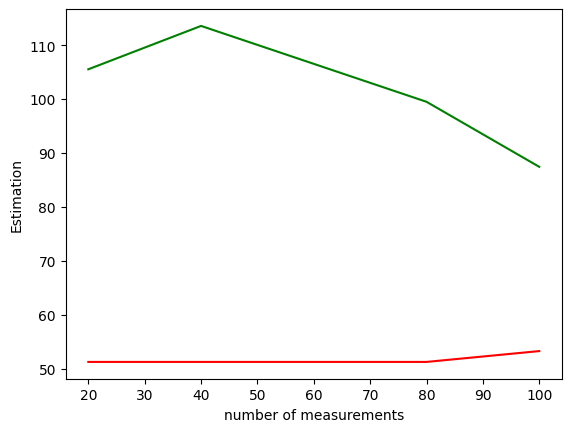

In [6]:
# Playing with the number of measurements
SCALE_ERR = 5
N_MEASURMENTSs = [20, 40, 80, 100]
MLEs = []
MAPs = []
for N_MEASURMENTS in N_MEASURMENTSs:
    tmp1, tmp2, _ = estimator.result(N_MEASURMENTS, BARREL, WEIGHT_GUESSES,\
                                     ERROR_GUESSES, PRIOR_WEIGHT, PRIOR_ERR, LOG_PRIOR_GRID)
    MLEs.append(tmp1)
    MAPs.append(tmp2)

plt.plot(N_MEASURMENTSs, MLEs, color='green')
plt.plot(N_MEASURMENTSs, MAPs, color='red')
plt.xlabel("number of measurements")
plt.ylabel("Estimation")
plt.show()

Text(0, 0.5, 'Estimation')

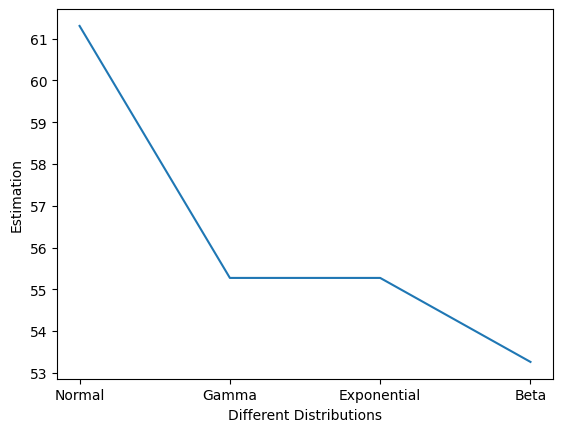

In [7]:
# Playing with the Prior Values and Distribution
import scipy
N_MEASURMENTS = 100

Distributions = ['Normal', 'Gamma', 'Exponential', 'Beta']

PRIOR_WEIGHT1 = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_WEIGHT2 = scipy.stats.gamma(a=2, scale=1).logpdf(WEIGHT_GUESSES)
PRIOR_WEIGHT3 = scipy.stats.expon(scale=1/50).logpdf(WEIGHT_GUESSES)
PRIOR_WEIGHT4 = scipy.stats.beta(a=2, b=5).logpdf((WEIGHT_GUESSES - 1) / (200 - 1))
PRIOR_WEIGHTS = []
PRIOR_WEIGHTS.append(PRIOR_WEIGHT1)
PRIOR_WEIGHTS.append(PRIOR_WEIGHT2)
PRIOR_WEIGHTS.append(PRIOR_WEIGHT3)
PRIOR_WEIGHTS.append(PRIOR_WEIGHT4)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

MAPs = []
for PRIOR_WEIGHT in PRIOR_WEIGHTS:
    _, tmp, _ = estimator.result(N_MEASURMENTS, BARREL, WEIGHT_GUESSES,\
                                     ERROR_GUESSES, PRIOR_WEIGHT, PRIOR_ERR, LOG_PRIOR_GRID)
    MAPs.append(tmp)

plt.plot(Distributions, MAPs)
plt.xlabel("Different Distributions")
plt.ylabel("Estimation")

<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

***Answer: The sensitivity of the Maximum A Posteriori (MAP) estimate to the choice of prior is influenced by several factors. A well-informed and accurate prior that aligns closely with the true distribution of the parameter tends to yield a MAP estimate that is closer to the true value. However, an uninformative or poorly chosen prior can introduce bias into the estimate. The impact of the prior choice is more pronounced when the likelihood function is flat or uninformative, as the prior can exert a stronger influence on the estimate in such cases. Additionally, the scale of the parameter being estimated plays a role, with smaller-scale parameters being more sensitive to the choice of prior. Overall, the sensitivity of the MAP estimate to the prior highlights the importance of carefully selecting a prior based on the specific characteristics of the problem and performing sensitivity analyses to assess the robustness of the estimate..***

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?


***Answer: 
For MAP estimation, the grid size can significantly affect the estimate, especially if the true posterior distribution has multiple peaks or sharp changes. A smaller grid size can lead to oversmoothing, where the estimated MAP value might be biased towards the grid points, missing the true peak. Conversely, a larger grid size can result in undersampling, missing important features of the true posterior distribution.
MLE is generally less sensitive to the grid size compared to MAP, especially if the prior distribution is relatively flat or uninformative. However, for highly skewed or multimodal likelihood functions, a coarse grid might miss important details, leading to biased estimates.***